In [180]:
# Import the actual code
from utils import extract_authors
from utils import clean_author_names
from utils import create_author_count_dataframe

In [181]:
# Import necessary libraries
import pandas as pd

In [182]:
# Define the method. This defines which dataset to use, based on TERRA: https://terra.cser.ac.uk/
# method can be "manual", "low_recall", "medium_recall", "high_recall"
method = "manual"

In [183]:
# Read in the data
bib = pd.read_csv("bibliography_" + method +".csv")
bib.head()

,Authors,Year,Title,Journal,Volume,Issue,DOI,Number_of_Assessments,Number_Relevant,Relevance
0,"Denkenberger D., Turchin A.",2018,Global catastrophic and existential risks comm...,Futures,NaN,NaN,10.1016/j.futures.2018.01.003,18,18,18.0
1,"Blair R.W., Denkenberger D.C.",2018,Interventions that may prevent or mollify supe...,Futures,NaN,NaN,10.1016/j.futures.2018.01.002,12,12,12.0
2,"Wintle B.C., Sutherland W.J., Rees M.J., Avin ...",2018,Classifying global catastrophic risks,Futures,NaN,NaN,10.1016/j.futures.2018.02.001,13,12,11.0
3,"Gloor L., Sotala K.",2017,Superintelligence as a cause or cure for risks...,Informatica (Slovenia),41,4,NaN,11,11,11.0
4,Halstead J.,2018,Stratospheric aerosol injection research and e...,Futures,NaN,NaN,10.1016/j.futures.2018.03.004,10,10,10.0


In [184]:
# Exclude the non relevant papers form the manual list
if method == "manual":
    bib = bib[bib["Relevance"] > 0]

In [185]:
# Drop all rows where authors are not present
bib = bib.dropna(subset=['Authors'])

In [186]:
# Extract the names and put them all in one list
authors = extract_authors(bib)
print (authors[:10])

['Denkenberger D.', 'Turchin A.', 'Blair R.W.', 'Denkenberger D.C.', 'Wintle B.C.', 'Sutherland W.J.', 'Rees M.J.', 'Avin S.', 'Weitzdörfer J.', 'Ó hÉigeartaigh S.S.']


In [187]:
# Unify the names in the same format of lastname + first initial.
cleaned_authors = clean_author_names(authors)
print(cleaned_authors[:10])

['Denkenbergerd', 'Turchina', 'Blairr', 'Denkenbergerd', 'Wintleb', 'Sutherlandw', 'Reesm', 'Avins', 'Weitzdörferj', 'Óhéigeartaighs']


In [188]:
# Create the dataframe with all the names and counts
count_df = create_author_count_dataframe(cleaned_authors)
# Sort by count
count_df = count_df.sort_values('Count', ascending=False)
count_df.head()

,Count,Name
15,27,S. Baum
0,16,D. Denkenberger
113,14,N. Bostrom
38,11,B. Tonn
19,11,P. Torres


In [189]:
# Reset the index of the dataframe
count_df.reset_index(inplace=True, drop=True)
count_df.head()

,Count,Name
0,27,S. Baum
1,16,D. Denkenberger
2,14,N. Bostrom
3,11,B. Tonn
4,11,P. Torres


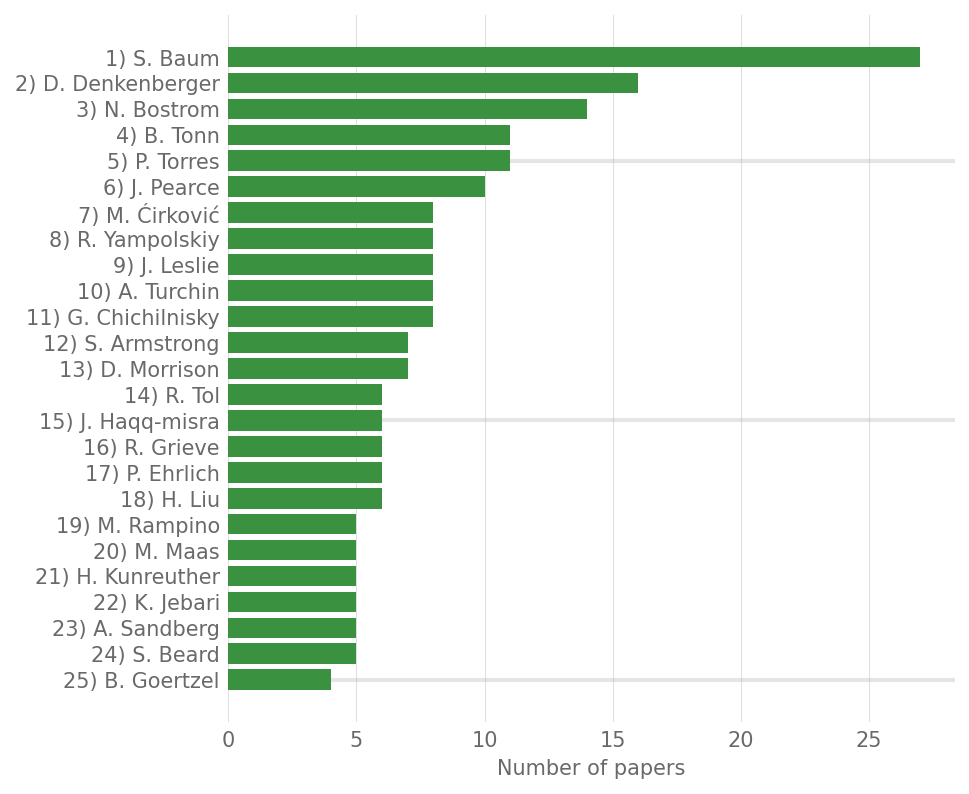

In [190]:
import matplotlib.pyplot as plt
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

# Plot the first x names
x = 25
selection = count_df.iloc[0:x, :]

# Sort the selection DataFrame in ascending order by the 'Count' column
sorted_selection = selection.sort_values(by='Count', ascending=True)

# Create labels with descending numbers and names
labels = [f"{x - i}) {name}" for i, name in enumerate(sorted_selection['Name'])]

# Create the plot
fig, ax = plt.subplots(figsize=(x / 4, x / 4))
ax.barh(labels, sorted_selection['Count'])
ax.yaxis.grid(False)
ax.set_xlabel("Number of papers")

# Add a vertical line for every 10th name
for i in range(0, x, 10):
    ax.axhline(i, color='black', alpha=0.1, zorder=0)

# Make the background opaque
fig.patch.set_alpha(1)

plt.savefig("author_count_" + method + ".png", dpi=300, bbox_inches='tight')
plt.show()
